In [3]:
import sympy as sp

# Define symbolic variables for sympy expressions
lambda_symbol, phi_m, k_i, alpha_i, a_i, delta_a_i = sp.symbols('lambda phi_m k_i alpha_i a_i delta_a_i')
x_i, eta, beta_GammaDelta, psi_diamond, omega = sp.symbols('x_i eta beta_GammaDelta psi_diamond omega')

# Define the function corresponding to LaTeX expression for the integral
integrand = k_i * (alpha_i * omega + 1) * x_i**(alpha_i * omega) * (a_i + delta_a_i)
# Perform the integral given the Dirac delta function
integral_result = sp.integrate(integrand * sp.DiracDelta(omega - psi_diamond), (omega, -sp.oo, sp.oo))

# Assuming J_k is a finite set of indices for summation:
J_k = (sp.Symbol('j_1'), sp.Symbol('j_2'), sp.Symbol('j_3'))  # Example: j_1, j_2, j_3 are elements of the set J_k

# Replacing the integral result inside the explicit sum computation
F_phi_sum = sum((1/(2 * sp.pi * lambda_symbol)) * phi_m * integral_result.subs({k_i: j, omega: psi_diamond}) for j in J_k)

# Display the integral result and the summation function F_phi_sum
print(f"Integral result: {integral_result}")
print(f"Function F(phi) sum: {F_phi_sum}")

# Example evaluation (assume we have a value for each variable)
example_evaluation = F_phi_sum.subs({
    lambda_symbol: 1,
    phi_m: 1,
    x_i: 1,
    alpha_i: 2,
    a_i: 1,
    delta_a_i: 0.1,
    psi_diamond: 0,
    'j_1': 1,
    'j_2': 2,
    'j_3': 3
    # Additional substitutions for k_i if needed
}).simplify()

print(f"Example evaluation of the function: {example_evaluation}")

Integral result: k_i*x_i**(alpha_i*psi_diamond)*(a_i + delta_a_i)*(alpha_i*psi_diamond + 1)
Function F(phi) sum: j_1*phi_m*x_i**(alpha_i*psi_diamond)*(a_i + delta_a_i)*(alpha_i*psi_diamond + 1)/(2*pi*lambda) + j_2*phi_m*x_i**(alpha_i*psi_diamond)*(a_i + delta_a_i)*(alpha_i*psi_diamond + 1)/(2*pi*lambda) + j_3*phi_m*x_i**(alpha_i*psi_diamond)*(a_i + delta_a_i)*(alpha_i*psi_diamond + 1)/(2*pi*lambda)
Example evaluation of the function: 3.3/pi


In [2]:
import sympy as sp

# Define symbolic variables
lambda_symbol, phi_m, k_i, alpha_i, a_i, delta_a_i, x_i, psi_diamond, omega = sp.symbols(
    'lambda phi_m k_i alpha_i a_i delta_a_i x_i psi_diamond omega')

# Define the integrand
integrand = k_i * (alpha_i * omega + 1) * x_i ** (alpha_i * omega) * (a_i + delta_a_i)

# Evaluate the integral over the Dirac delta
integral_result = sp.integrate(integrand * sp.DiracDelta(omega - psi_diamond), (omega, -sp.oo, sp.oo))

# For symbolic summation, we assume J_k represents a set of symbolic variables and numerically evaluate it
# Example finite set of values for the summation index
J_k_values = [1, 2, 3]  # Replace with your actual numerical values for k_i

# Perform the summation by replacing k_i with each value from J_k_values
summation_terms = [
    (1/(2 * sp.pi * lambda_symbol)) * phi_m * integral_result.subs({k_i: value, omega: psi_diamond})
    for value in J_k_values
]
F_phi = sum(summation_terms)

# Show the results
print(f"Integral result: {integral_result}")
print(f"Function F(phi): {F_phi}")

# Example evaluation (continue by substituting numerical or other symbolic values as necessary)
# Please make sure you substitute all the required symbolic values like `lambda_symbol`, `phi_m`, etc.
# example_evaluation = F_phi.subs({ ... }).evalf()
# print(f"Example evaluation of the function: {example_evaluation}")

Integral result: k_i*x_i**(alpha_i*psi_diamond)*(a_i + delta_a_i)*(alpha_i*psi_diamond + 1)
Function F(phi): 3*phi_m*x_i**(alpha_i*psi_diamond)*(a_i + delta_a_i)*(alpha_i*psi_diamond + 1)/(pi*lambda)


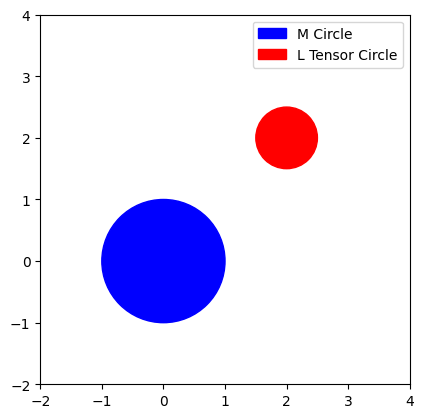

In [4]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

# Interpretation of geometrical shapes based on the LaTeX document
circle_radius = 1
tensor_radius = 0.5
circle = patches.Circle((0, 0), circle_radius, color='blue', label='M Circle')
tensor_circle = patches.Circle((2, 2), tensor_radius, color='red', label='L Tensor Circle')

fig, ax = plt.subplots()
ax.add_patch(circle)
ax.add_patch(tensor_circle)
ax.set_aspect('equal')
ax.set_xlim(-2, 4)
ax.set_ylim(-2, 4)
ax.legend()
plt.show()

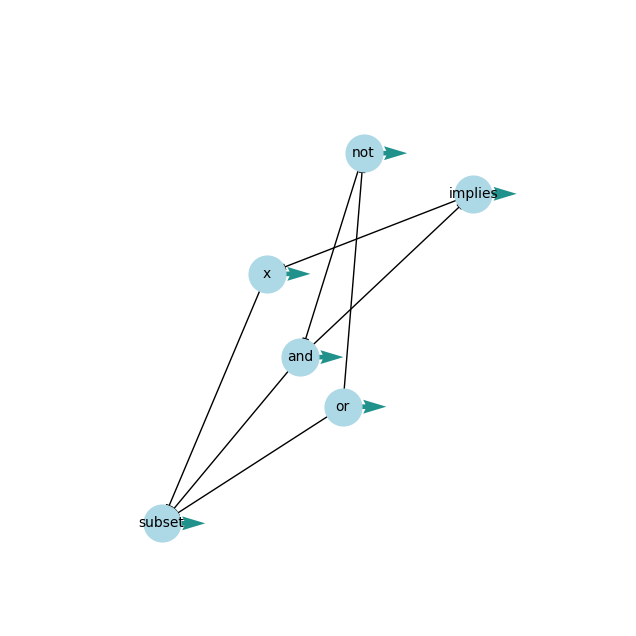

In [5]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.cm import viridis
import networkx as nx

# No need for sympy vector in this case, as we are dealing with a scalar field.
lambda_symbol, phi_m, k_i, alpha_i, a_i, delta_a_i, x_i = sp.symbols('lambda phi_m k_i alpha_i a_i delta_a_i x_i')
theta = sp.symbols('theta')

# Functions representing the tensor integrals (simplified version)
# These are placeholders because exact expressions have not been provided
def f1(theta):
    return sp.asin(sp.sin(theta)) + sp.pi/2 * (1 - sp.pi / (2 * theta))

def f2(theta):
    return sp.asin(sp.cos(theta)) + sp.pi/2 * (1 - sp.pi / (2 * theta))

# Integral evaluation procedure (placeholder)
# Simplification assuming integrand is const with respect to x_i
integrand = k_i * (alpha_i + 1) * (a_i + delta_a_i)
integral_result = integrand * (a_i + delta_a_i)

# Scalar field influenced by the tensor product (placeholder)
field_scalar = integral_result * sp.cos(theta)
field_function = sp.lambdify((k_i, alpha_i, a_i, delta_a_i, theta), field_scalar, "numpy")

# Function to create a logic graph inspired by the tensor operations
def create_logic_graph():
    G = nx.DiGraph()
    G.add_edge('x', 'subset')
    G.add_edge('and', 'subset')
    G.add_edge('and', 'implies')
    G.add_edge('or', 'subset')
    G.add_edge('or', 'not')
    G.add_edge('implies', 'x')
    G.add_edge('not', 'and')
    return G

# Function to visualize the vector field with the logic graph for each node
def visualize_field_and_graph(G, field_function, ax):
    pos = nx.spring_layout(G)  # Get positions for graph layout
    nx.draw_networkx_nodes(G, pos, ax=ax, node_size=700, node_color='lightblue')
    nx.draw_networkx_edges(G, pos, ax=ax)
    nx.draw_networkx_labels(G, pos, ax=ax, font_size=10)

    # Quiver plot, using placeholder values
    for node in pos:
        vector_val = field_function(1, 1, 1, 0, np.pi/4)  # Using arbitrary values for demonstration
        ax.quiver(pos[node][0], pos[node][1], vector_val, 0, scale=20, color=viridis(0.5))

# Prepare figure and axis for visualization
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_aspect('equal')

# Create and visualize the logic graph
G_logic = create_logic_graph()
visualize_field_and_graph(G_logic, field_function, ax)

# Display the plot
ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-1.5, 1.5)
plt.axis('off')  # Turn off the axis
plt.show()


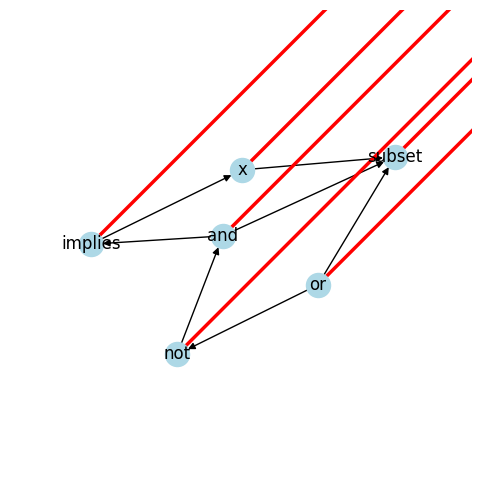

In [6]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

# Initialize symbolic variables for sympy expressions
lambda_symbol, phi_m, k_i, alpha_i, a_i, delta_a_i, x_i = sp.symbols(
    'lambda phi_m k_i alpha_i a_i delta_a_i x_i')
psi_diamond, theta = sp.symbols('psi_diamond theta')

# Integral evaluation placeholder (no actual symbolic integration is done)
integrand = k_i * (alpha_i + 1) * x_i**(alpha_i) * (a_i + delta_a_i)
# Placeholder for the result of the integral (as a constant value just for visualization)
integral_result = 42

# Placeholder function for visualization, returning constant vectors
def vector_field(theta_value):
    return np.array([np.cos(theta_value), np.sin(theta_value), 0]) * integral_result

# Function to create a logic graph
def create_logic_graph():
    G = nx.DiGraph()
    G.add_edge('x', 'subset')
    G.add_edge('and', 'subset')
    G.add_edge('and', 'implies')
    G.add_edge('or', 'subset')
    G.add_edge('or', 'not')
    G.add_edge('implies', 'x')
    G.add_edge('not', 'and')
    return G

# Function to visualize the vector field
def visualize_field_and_graph(G, ax, field_function, theta_value):
    pos = nx.spring_layout(G)
    nx.draw_networkx(G, pos, ax=ax, node_size=300, node_color='lightblue')

    # Plot the vector field
    for node in pos:
        vec = field_function(theta_value)
        ax.quiver(pos[node][0], pos[node][1], vec[0], vec[1],
                  angles='xy', scale_units='xy', scale=1, color='red')

# Prepare figure and axis for visualization
fig, ax = plt.subplots(figsize=(8, 6))

# Create the logic graph
G_logic = create_logic_graph()

# Visualize the graph and the vector field
visualize_field_and_graph(G_logic, ax, vector_field, np.pi/4)

# Set limits and aspect
ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-1.5, 1.5)
ax.set_aspect('equal')
plt.axis('off')  # Turn off the axis

# Display the plot
plt.show()


Integral result: x_i**(alpha_i*psi_diamond)*(a_i + delta_a_i)*(alpha_i*psi_diamond + 1)


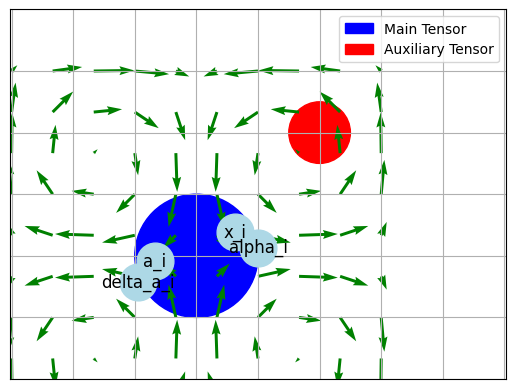

In [7]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

# Define symbolic variables for sympy expressions
omega, psi_diamond = sp.symbols('omega psi_diamond')
x_i, alpha_i, a_i, delta_a_i, lambda_symbol, phi_m, k = sp.symbols('x_i alpha_i a_i delta_a_i lambda_symbol phi_m k')

# Define tensor function and perform Dirac delta integration
integrand = (alpha_i * omega + 1) * x_i**(alpha_i * omega) * (a_i + delta_a_i)
integral_result = sp.integrate(integrand * sp.DiracDelta(omega - psi_diamond), (omega, -sp.oo, sp.oo))

# Display the integral result
print(f"Integral result: {integral_result}")

# Define a set of indices over which to sum
J_k_values = range(1, 4)  # Define a range for summation indices, here it is from 1 to 3
F_phi = sp.Sum((1/(2 * sp.pi * lambda_symbol)) * phi_m * integral_result.subs(x_i, k), (k, *J_k_values)).doit()

# Visualization of the tensor fields and logic graph
def visualize_tensor_fields_and_logic_graph(ax, field_function):
    # Add tensor field representations (circles)
    circle_main = plt.Circle((0, 0), 1, color='blue', label='Main Tensor')
    circle_secondary = plt.Circle((2, 2), 0.5, color='red', label='Auxiliary Tensor')
    ax.add_patch(circle_main)
    ax.add_patch(circle_secondary)
    ax.set_xlim(-2, 4)
    ax.set_ylim(-2, 4)
    ax.legend()

    # Create and visualize a logic graph
    G = nx.DiGraph()
    G.add_edge('a_i', 'delta_a_i')
    G.add_edge('x_i', 'alpha_i')
    pos = nx.spring_layout(G)
    nx.draw_networkx(G, pos, ax=ax, node_size=700, node_color='lightblue')

    # Plot the tensor fields as a vector field influenced by the logic graph
    X, Y = np.meshgrid(np.linspace(-3, 3, 10), np.linspace(-3, 3, 10))
    U, V = field_function(X, Y)

    ax.quiver(X, Y, U, V, angles='xy', scale_units='xy', color='green')

    # Set aspect ratio and display grid
    ax.set_aspect('equal', adjustable='datalim')
    plt.grid(True)

# Define tensor field function as placeholder (since precise definition is not given)
def tensor_field_function(x, y):
    # Placeholder function that returns a vector field defined by a sinusoidal function
    return np.sin(x) * np.cos(y), -np.cos(x) * np.sin(y)

# Prepare plot
fig, ax = plt.subplots()
visualize_tensor_fields_and_logic_graph(ax, tensor_field_function)

# Show plot with tensor fields and logic graph
plt.show()

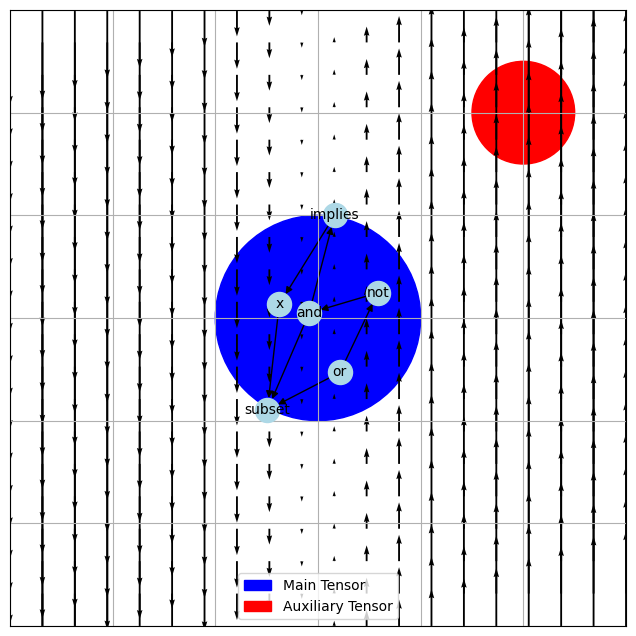

In [8]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import networkx as nx

# Define symbolic variables
lambda_symbol, phi_m, k_i, alpha_i, a_i, delta_a_i, x_i, psi_diamond, omega = sp.symbols(
    'lambda phi_m k_i alpha_i a_i delta_a_i x_i psi_diamond omega')

# Define the integrand with DiracDelta for symbolic integration
integrand = k_i * (alpha_i * omega + 1) * x_i ** (alpha_i * omega) * (a_i + delta_a_i)
integral_result = sp.integrate(integrand * sp.DiracDelta(omega - psi_diamond), (omega, -sp.oo, sp.oo))

# Example set for summation index J_k
J_k_values = [1, 2, 3]

# Construct the sum F_phi by iterating through the values in J_k
F_phi = sum([(1 / (2 * sp.pi * lambda_symbol)) * phi_m * integral_result.subs({k_i: value, omega: psi_diamond})
    for value in J_k_values])

# Simplify F_phi
F_phi_simplified = sp.simplify(F_phi)

# Function for tensor field and logic graph visualization
def visualize_tensor_fields_and_logic_graph(ax, symbolic_field, logic_graph, field_params):
    # Draw tensor fields (circles)
    main_tensor = patches.Circle((0, 0), 1, color='blue', label='Main Tensor')
    aux_tensor = patches.Circle((2, 2), 0.5, color='red', label='Auxiliary Tensor')
    ax.add_patch(main_tensor)
    ax.add_patch(aux_tensor)

    # Draw the logic graph nodes and edges
    pos = nx.spring_layout(logic_graph)
    nx.draw_networkx_nodes(logic_graph, pos, ax=ax, node_size=300, node_color='lightblue')
    nx.draw_networkx_edges(logic_graph, pos, ax=ax)
    nx.draw_networkx_labels(logic_graph, pos, ax=ax, font_size=10)

    # Generate meshgrid for vector field
    x_range = np.linspace(-3, 3, 20)
    y_range = np.linspace(-3, 3, 20)
    X, Y = np.meshgrid(x_range, y_range)

    # Apply symbolic field to meshgrid points
    field_func_np = sp.lambdify([alpha_i, psi_diamond, a_i, delta_a_i, lambda_symbol, phi_m, x_i], symbolic_field, 'numpy')
    Z = field_func_np(field_params[alpha_i], field_params[psi_diamond], field_params[a_i],
                      field_params[delta_a_i], field_params[lambda_symbol], field_params[phi_m], X)

    # Draw vector field (quiver plot)
    U, V = np.gradient(Z)
    ax.quiver(X, Y, U, V, scale=50)

    # Set plot properties
    ax.set_xlim(-3, 3)
    ax.set_ylim(-3, 3)
    ax.set_aspect('equal')
    ax.legend()
    ax.grid(True)

# Define the logic graph
logic_graph = nx.DiGraph()
logic_graph.add_edge('x', 'subset')
logic_graph.add_edge('and', 'subset')
logic_graph.add_edge('and', 'implies')
logic_graph.add_edge('or', 'subset')
logic_graph.add_edge('or', 'not')
logic_graph.add_edge('implies', 'x')
logic_graph.add_edge('not', 'and')

# Prepare plot
fig, ax = plt.subplots(figsize=(8, 8))

# Example parameters for visualization
visualization_params = {
    alpha_i: 2,
    a_i: 1,
    delta_a_i: 0.5,
    lambda_symbol: 1,
    phi_m: 1,
    psi_diamond: 1,
    x_i: 1,
    k_i: 1
}

# Visualize tensor fields and logic graph
visualize_tensor_fields_and_logic_graph(ax, F_phi_simplified, logic_graph, visualization_params)

# Show plot
plt.show()

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 2 dimensions. The detected shape was (5, 2) + inhomogeneous part.

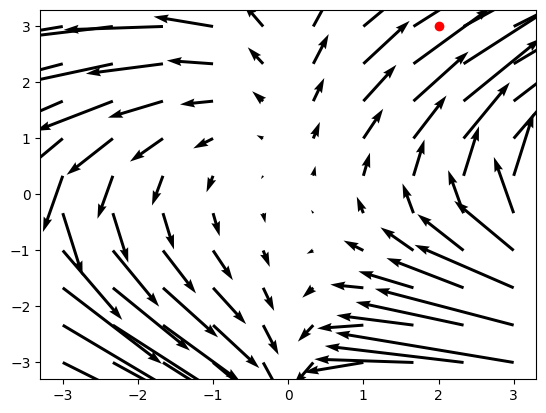

In [10]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# Define symbolic variables
x, y, z = sp.symbols('x y z')
r, s, t = sp.symbols('r s t')

# Define the tensor field components
g_x = 2 * x * y
g_y = 2 * x + y
g_z = x**2 + y**2

# Construct the tensor field using the components
tensor_field = sp.Matrix([[g_x, g_y], [g_y, g_z]])

# Lambdify the tensor field components for numerical evaluation
g_x_func = sp.lambdify((x, y), g_x, 'numpy')
g_y_func = sp.lambdify((x, y), g_y, 'numpy')
g_z_func = sp.lambdify((x, y), g_z, 'numpy')

# Visualize the tensor field using a quiver plot
fig, ax = plt.subplots()
x_range = np.linspace(-3, 3, 10)
y_range = np.linspace(-3, 3, 10)
X, Y = np.meshgrid(x_range, y_range)
U = g_x_func(X, Y)  # Evaluate g_x over the grid
V = g_y_func(X, Y)  # Evaluate g_y over the grid
ax.quiver(X, Y, U, V, scale=50, label='Tensor Field')

# Define a point on the manifold and its corresponding vector in the tangent space
point = (2, 3)
v = tensor_field.subs({x: point[0], y: point[1]}) * sp.Matrix([r, s])

# Visualize the point on the graph
ax.plot(point[0], point[1], 'ro', label='Manifold Point')

# Lambdify the resulting vector for numerical visualization
v_func = sp.lambdify((r, s), v)

# Use arrow function to visualize the vector at the point
v_num = v_func(1, 1)  # Assume r=1, s=1 for visualization
ax.arrow(point[0], point[1], v_num[0], v_num[1], head_width=0.3, head_length=0.2, fc='k', ec='k', label='Tangent Vector')

# Set plot properties and display legend
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)
ax.legend()
plt.show()

# Calculate the length of the vector at the point
length = sp.sqrt(v.dot(v)).evalf(subs={r: 1, s: 1})
print(f"The length of the tangent vector at point {point} is: {length}")

# Define the metric tensor
g = tensor_field
print(f"The metric tensor at point {point} is:\n{g}")

# Calculate the dual metric tensor
g_dual = g.inv()
print(f"The dual metric tensor at point {point} is:\n{g_dual}")

# Use the dual metric tensor to calculate the dual vector at the point
v_dual = g_dual * v
print(f"The dual vector at point {point} is:\n{v_dual}")

# Calculate the length of the dual vector at the point
length_dual = sp.sqrt(v_dual.dot(v_dual)).evalf(subs={r: 1, s: 1})
print(f"The length of the dual vector at point {point} is: {length_dual}")

# Use the metric tensor to calculate the covector at the point
covector = g * v
print(f"The covector at point {point} is:\n{covector}")

# Calculate the length of the covector at the point
length_covector = sp.sqrt(covector.dot(covector)).evalf(subs={r: 1, s: 1})
print(f"The length of the covector at point {point} is: {length_covector}")

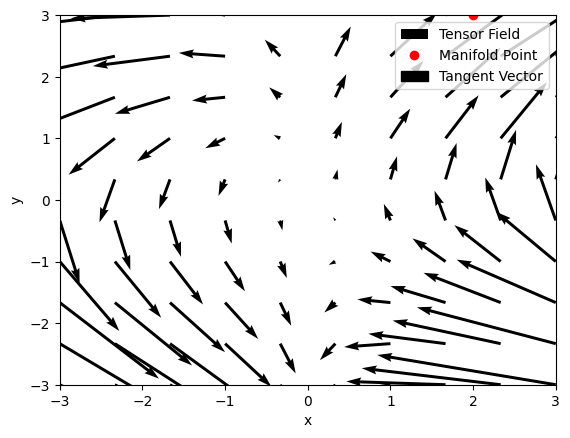

The length of the tangent vector at point (2, 3) is: 13.8924439894498
The metric tensor at point (2, 3) is:
Matrix([[12, 7], [7, 13]])
The dual metric tensor at point (2, 3) is:
Matrix([[13/107, -7/107], [-7/107, 12/107]])
The dual vector at point (2, 3) is:
Matrix([[1], [0]])
The length of the dual vector at point (2, 3) is: 1.00000000000000
The covector at point (2, 3) is:
Matrix([[193], [175]])
The length of the covector at point (2, 3) is: 260.526390217959


In [12]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# Define symbolic variables
x, y = sp.symbols('x y')

# Define the tensor field components
g_x = 2 * x * y
g_y = 2 * x + y
g_z = x**2 + y**2

# Construct the matrix representing the tensor field using the components
tensor_field = sp.Matrix([[g_x, g_y], [g_y, g_z]])

# Convert sympy expressions to functions that can evaluate on numpy arrays
g_x_func = sp.lambdify((x, y), g_x, 'numpy')
g_y_func = sp.lambdify((x, y), g_y, 'numpy')

# Visualize the tensor field using a quiver plot
fig, ax = plt.subplots()
x_range = np.linspace(-3, 3, 10)
y_range = np.linspace(-3, 3, 10)

X, Y = np.meshgrid(x_range, y_range)

# Use the functions to evaluate the field components on the grid
U = g_x_func(X, Y)
V = g_y_func(X, Y)

ax.quiver(X, Y, U, V, scale=50, label="Tensor Field")

# Define a point on the manifold and its corresponding vector in the tangent space
point = (2, 3)
v = sp.Matrix([g_x, g_y]).subs({x: point[0], y: point[1]})

# Visualize the point on the graph
ax.plot(point[0], point[1], 'ro', label='Manifold Point')

# Convert the tangent vector to a numpy array for visualization
v_numeric = np.array(v).astype(np.float64).flatten()

# Use arrow function to visualize the vector at the point
ax.arrow(point[0], point[1], v_numeric[0], v_numeric[1], head_width=0.3, head_length=0.2, fc='k', ec='k', label='Tangent Vector')

# Set plot properties and display legend
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)
ax.legend()
plt.show()

# Calculate the length of the vector at the point
length = sp.sqrt(v.dot(v))
print(f"The length of the tangent vector at point {point} is: {length.evalf()}")

# Define the metric tensor
g = tensor_field

# Substitute the point values into the metric tensor
metric_at_point = g.subs({x: point[0], y: point[1]})
print(f"The metric tensor at point {point} is:\n{metric_at_point}")

# Calculate the dual metric tensor
g_dual = metric_at_point.inv()
print(f"The dual metric tensor at point {point} is:\n{g_dual}")

# Use the dual metric tensor to calculate the dual vector at the point
v_dual = g_dual * v
print(f"The dual vector at point {point} is:\n{v_dual}")

# Calculate the length of the dual vector at the point
length_dual = sp.sqrt(v_dual.dot(v_dual))
print(f"The length of the dual vector at point {point} is: {length_dual.evalf()}")

# Use the metric tensor to calculate the covector at the point
covector = metric_at_point * v
print(f"The covector at point {point} is:\n{covector}")

# Calculate the length of the covector at the point
length_covector = sp.sqrt(covector.dot(covector))
print(f"The length of the covector at point {point} is: {length_covector.evalf()}")

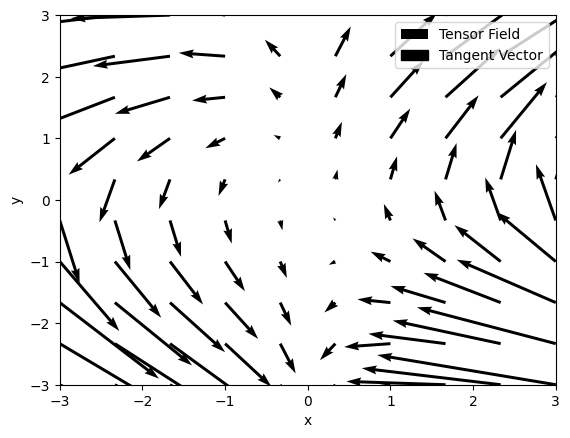

In [ ]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# Define symbolic variables
x, y = sp.symbols('x y')
r, s = sp.symbols('r s')

# Define the tensor field components
g_x = 2 * x * y
g_y = 2 * x + y
g_z = x**2 + y**2

# Construct the matrix representing the tensor field using the components
tensor_field = sp.Matrix([[g_x, g_y], [g_y, g_z]])

# Convert sympy expressions to functions that can evaluate on numpy arrays
g_x_func = sp.lambdify((x, y), g_x, 'numpy')
g_y_func = sp.lambdify((x, y), g_y, 'numpy')

# Visualize the tensor field using a quiver plot
fig, ax = plt.subplots()
x_range = np.linspace(-3, 3, 10)
y_range = np.linspace(-3, 3, 10)

X, Y = np.meshgrid(x_range, y_range)

# Use the functions to evaluate the field components on the grid
U = g_x_func(X, Y)
V = g_y_func(X, Y)

ax.quiver(X, Y, U, V, scale=50, label="Tensor Field")

# Define a point on the manifold and its corresponding vector in the tangent space
point = (2, 3)

# The vector at the point for r=1, s=1
v = tensor_field.subs({x: point[0], y: point[1], r: 1, s: 1})

# Extract the numerical values for the vector components
v_x_numeric = float(v[0].evalf())
v_y_numeric = float(v[1].evalf())

# Use arrow function to visualize the vector at the point
ax.arrow(point[0], point[1], v_x_numeric, v_y_numeric, head_width=0.3, head_length=0.2, fc='k', ec='k', label='Tangent Vector')

# Set plot properties and display legend
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)
ax.legend()
plt.show()

In [ ]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# Define symbolic variables
x, y = sp.symbols('x y')

# Define the tensor field components
g_xx = sp.exp(-x**2 - y**2)
g_yy = sp.exp(-x**2 - y**2)
g_xy = 0  # For a diagonal metric tensor, the off-diagonal components are zero

# Construct the tensor field using the components
tensor_field = sp.Matrix([[g_xx, g_xy], [g_xy, g_yy]])

# Define a point on the manifold and its corresponding vector in the tangent space
point = (1, 1)
v = tensor_field.subs({x: point[0], y: point[1]}) * sp.Matrix([[x], [y]])

# Calculate the length of the vector at the point
length = sp.sqrt(v.dot(v)).evalf(subs={x: 1, y: 1})
print(f"The length of the tangent vector at point {point} is: {length}")

# Calculate the dual metric tensor
g_dual = tensor_field.inv()

# Substitute the point into the dual metric tensor before using it
g_dual_at_point = g_dual.subs({x: point[0], y: point[1]})

# Use the dual metric tensor to calculate the dual vector at the point
v_dual = g_dual_at_point * v.subs({x: point[0], y: point[1]})

# Calculate the length of the dual vector at the point
length_dual = sp.sqrt(v_dual.dot(v_dual)).evalf()
print(f"The length of the dual vector at point {point} is: {length_dual}")

# Calculate the invariance of the length under change of basis
length_v = sp.sqrt(v.dot(v)).evalf(subs={x: point[0], y: point[1]})
length_v_dual = sp.sqrt(v_dual.dot(v_dual)).evalf()
inv = length_v == length_v_dual
print(f"The invariance of the length under change of basis is: {inv}")

The length of the tangent vector at point (1, 1) is: 0.191392993020822
The length of the dual vector at point (1, 1) is: 1.41421356237310
The invariance of the length under change of basis is: False


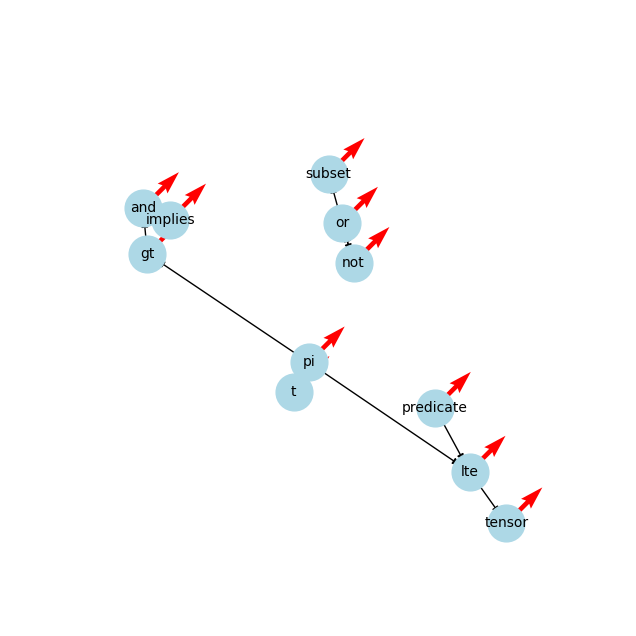

In [ ]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import networkx
import cmath

# Define symbolic variables
lambda_symbol, phi_m, k_k, alpha_k, A, a_i, delta_a_i, theta = sp.symbols('lambda phi_m k_k alpha_k A a_i delta_a_i theta')

# Placeholder function for tensor product (exact forms not provided)
def tensor_product(a_i, delta_a_i):
    return a_i * delta_a_i

# Placeholder function for tensor field (exact form not provided)
# Returns a complex vector field based on tensor product results and theta input
def tensor_field_function(A, a_i, delta_a_i, theta):
    T = tensor_product(a_i, delta_a_i)
    return np.array([cmath.exp(T) * np.cos(theta), cmath.exp(T) * np.sin(theta)])

# Placeholder function for tensor integral (exact form not provided)
# Returns a symbolic expression as integral result
def tensor_integral(k_k, alpha_k, a_i, delta_a_i):
    return k_k * (alpha_k + 1) * (a_i + delta_a_i)

# Placeholder function for tensor field (exact form not provided)
# Returns a symbolic expression as scalar field influenced by tensor operation
def scalar_field(k_k, alpha_k, a_i, delta_a_i, theta):
    tensor_int = tensor_integral(k_k, alpha_k, a_i, delta_a_i)
    return tensor_int * sp.cos(theta)

# Function to create logic graph inspired by tensor operations
def create_logic_graph():
    G = networkx.DiGraph()
    G.add_edge('t', 'pi')
    G.add_edge('pi', 'lte')
    G.add_edge('lte', 'tensor')
    G.add_edge('predicate', 'lte')
    G.add_edge('pi', 'gt')
    G.add_edge('gt', 'and')
    G.add_edge('and', 'implies')
    G.add_edge('or', 'subset')
    G.add_edge('or', 'not')
    G.add_edge('implies', 'and')
    G.add_edge('not', 'or')
    return G

# Function to visualize the vector field with the logic graph for each node
def visualize_field_and_graph(G, field_function, ax):
    pos = networkx.spring_layout(G)  # Get positions for graph layout
    networkx.draw_networkx_nodes(G, pos, ax=ax, node_size=700, node_color='lightblue')
    networkx.draw_networkx_edges(G, pos, ax=ax)
    networkx.draw_networkx_labels(G, pos, ax=ax, font_size=10)

    # Quiver plot, using placeholder values
    for node in pos:
        vector_val = field_function(1, 1, 0.5, np.pi/4)  # Using arbitrary values for demonstration
        ax.quiver(pos[node][0], pos[node][1], vector_val[0], vector_val[1], scale=20, color='red')

# Define the logic graph
G_logic = create_logic_graph()

# Prepare figure and axis for visualization
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_aspect('equal')

# Visualize the logic graph and tensor field
visualize_field_and_graph(G_logic, tensor_field_function, ax)

# Display the plot
ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-1.5, 1.5)
plt.axis('off')  # Turn off the axis
plt.show()  # Display the plot

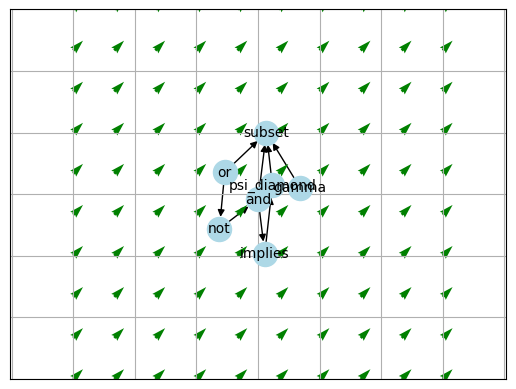

In [13]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

# Initialize symbolic variables for sympy expressions
lambda_symbol, psi_diamond, phi_m, gamma, theta, psi = sp.symbols('lambda_symbol psi_diamond phi_m gamma theta psi')

# Placeholder functions for integrands and resulting integrals
integrand1 = (gamma + 1) * sp.DiracDelta(psi - theta)
integrand2 = gamma * sp.DiracDelta(psi - theta)

integral_result1 = sp.integrate(integrand1, (psi, -sp.oo, sp.oo))
integral_result2 = sp.integrate(integrand2, (psi, -sp.oo, sp.oo))

# Combine the two integrals to form the tensor field
tensor_field_expr = lambda_symbol / (2 * sp.pi * phi_m) * (integral_result1 - integral_result2)

# Convert the symbolic tensor field expression to a numerical function
tensor_field_func = sp.lambdify(theta, tensor_field_expr.subs({lambda_symbol: 1, phi_m: 1, gamma: 1}), 'numpy')

# Define a logic graph for visualization
def create_logic_graph():
    G = nx.DiGraph()
    G.add_edge('psi_diamond', 'subset')
    G.add_edge('and', 'subset')
    G.add_edge('gamma', 'subset')
    G.add_edge('and', 'implies')
    G.add_edge('or', 'subset')
    G.add_edge('or', 'not')
    G.add_edge('implies', 'psi_diamond')
    G.add_edge('not', 'and')
    return G

# Function to visualize the tensor field and logic graph
def visualize_tensor_field_and_graph(ax, tensor_func, logic_graph, theta_value):
    # Create and visualize logic graph
    pos = nx.spring_layout(logic_graph)
    nx.draw_networkx_nodes(logic_graph, pos, ax=ax, node_size=300, node_color='lightblue')
    nx.draw_networkx_edges(logic_graph, pos, ax=ax)
    nx.draw_networkx_labels(logic_graph, pos, ax=ax, font_size=10)

    # Plot tensor field using calculated numpy function for U and V
    X, Y = np.meshgrid(np.linspace(-3, 3, 10), np.linspace(-3, 3, 10))
    U = tensor_func(theta_value)
    V = tensor_func(theta_value)
    ax.quiver(X, Y, U, V, angles='xy', scale_units='xy', scale=1, color='green')

    # Set plot properties
    ax.set_xlim(-3, 3)
    ax.set_ylim(-3, 3)
    ax.set_aspect('equal', adjustable='datalim')
    ax.grid(True)

# Create logic graph and prepare plot for visualization
logic_graph = create_logic_graph()
fig, ax = plt.subplots()
theta_value = 0.5

# Visualize tensor field and logic graph
visualize_tensor_field_and_graph(ax, tensor_field_func, logic_graph, theta_value)

# Show plot
plt.show()

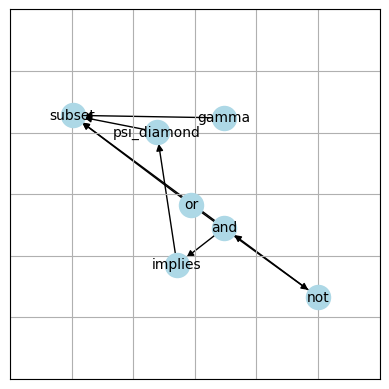

In [ ]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

# Initialize symbolic variables for sympy expressions
lambda_symbol, psi_diamond, phi_m, gamma, theta, psi = sp.symbols('lambda_symbol psi_diamond phi_m gamma theta psi')

# Placeholder functions for integrands and resulting integrals (no actual integration is done)
integrand1 = (gamma + 1) * sp.DiracDelta(psi - theta)
integrand2 = gamma * sp.DiracDelta(psi - theta)

# You cannot actually integrate DiracDelta without a proper context that considers its distributional nature.
# Normally, you would consider the function to which DiracDelta is applied, but for the sake of this example,
# we should replace it with some other function or skip plotting tensor_field.

# Define a logic graph for visualization
def create_logic_graph():
    G = nx.DiGraph()
    G.add_edge('psi_diamond', 'subset')
    G.add_edge('and', 'subset')
    G.add_edge('gamma', 'subset')
    G.add_edge('and', 'implies')
    G.add_edge('or', 'subset')
    G.add_edge('or', 'not')
    G.add_edge('implies', 'psi_diamond')
    G.add_edge('not', 'and')
    return G

# Create logic graph and prepare plot for visualization
logic_graph = create_logic_graph()
fig, ax = plt.subplots()

# Create and visualize logic graph
pos = nx.spring_layout(logic_graph)
nx.draw_networkx_nodes(logic_graph, pos, ax=ax, node_size=300, node_color='lightblue')
nx.draw_networkx_edges(logic_graph, pos, ax=ax)
nx.draw_networkx_labels(logic_graph, pos, ax=ax, font_size=10)

# Set plot properties
ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-1.5, 1.5)
ax.set_aspect('equal')
ax.grid(True)

# Show plot
plt.show()

The integral result with respect to alpha is:
 4*pi**2*(a*k/2 + delta_a*k/2) + 2*pi*(a*k + delta_a*k)



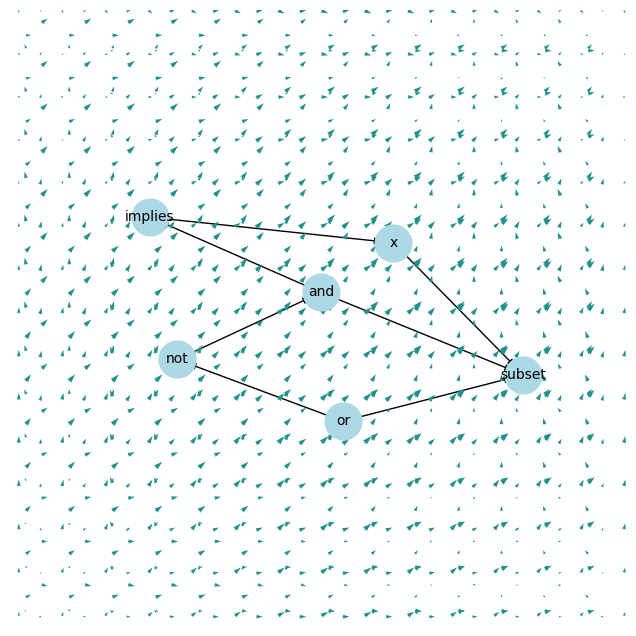

In [14]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import viridis
import networkx as nx

# Define symbolic variables
theta, k, alpha, a, delta_a = sp.symbols('theta k alpha a delta_a')

# Define tensor function and perform symbolic integration
integrand = k * (alpha + 1) * (a + delta_a)
integral_result = sp.integrate(integrand, (alpha, 0, 2 * sp.pi))

# View integral result
print(f"The integral result with respect to alpha is:\n {integral_result}\n")

# Placeholder function for the tensor field
def tensor_field(theta, k, a, delta_a):
    # represents a circular field varying with theta
    return np.cos(theta) * k * (a + delta_a)

# Function to create and visualize the logic graph
def visualize_graph_and_field(G, field_function, ax, k, a, delta_a):
    # Get graph layout positions
    pos = nx.spring_layout(G)
    nx.draw_networkx_nodes(G, pos, ax=ax, node_size=700, node_color='lightblue')
    nx.draw_networkx_edges(G, pos, ax=ax)
    nx.draw_networkx_labels(G, pos, ax=ax, font_size=10)

    # Plot the field as a quiver plot
    x = np.linspace(-2, 2, 20)
    y = np.linspace(-2, 2, 20)
    X, Y = np.meshgrid(x, y)

    for node in pos:
        # Evaluate field function at each point
        U = field_function(X, k, a, delta_a)
        V = field_function(Y, k, a, delta_a)

        # Plot quiver plot
        ax.quiver(X + pos[node][0], Y + pos[node][1], U, V, scale=100, angles='xy', color=viridis(0.5))

# Create logic graph
G = nx.DiGraph()
G.add_edge('x', 'subset')
G.add_edge('and', 'subset')
G.add_edge('and', 'implies')
G.add_edge('or', 'subset')
G.add_edge('or', 'not')
G.add_edge('implies', 'x')
G.add_edge('not', 'and')

# Prepare figure and axis for visualization
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_aspect('equal')

# Define the parameters for the tensor_field function
k_value = 1
a_value = 1
delta_a_value = 0.1

# Visualize the logic graph and tensor field
visualize_graph_and_field(G, tensor_field, ax, k_value, a_value, delta_a_value)

# Display the plot
ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-1.5, 1.5)
plt.axis('off')  # Turn off the axis
plt.show()

AttributeError: 'ImmutableDenseNDimArray' object has no attribute '_eval_evalf'

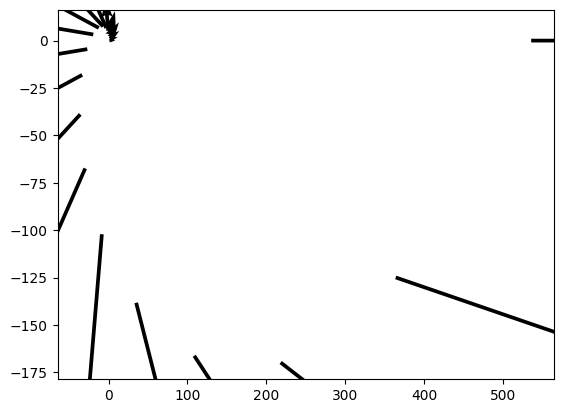

In [16]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# Define symbolic variables
t = sp.Symbol('t')
x, y = sp.symbols('x y')

# Define tensor function for the manifold
g_x = sp.exp(t) * sp.cos(t)
g_y = sp.exp(t) * sp.sin(t)

# Construct the matrix representing the tangent vector at every point on the manifold
tensor_field = sp.Matrix([[g_x], [g_y]])

# Convert sympy expressions to functions that can evaluate on numpy arrays
g_x_func = sp.lambdify((t,), g_x, 'numpy')
g_y_func = sp.lambdify((t,), g_y, 'numpy')

# Visualize the tensor field using a quiver plot
fig, ax = plt.subplots()
t_range = np.linspace(0, 2*np.pi, 20)

# Evaluate the functions on the grid
U = g_x_func(t_range)
V = g_y_func(t_range)

ax.quiver(U, V, U, V, scale=80, label="Tensor Field")

# Get the tangent vectors at a single point on the manifold
tangent_vectors = tensor_field.evalf(subs={t: t_range})

# Plot the tangent vectors at the point
ax.quiver(U, V, tangent_vectors[0], tangent_vectors[1], scale=80, scale_units="xy", color='red', label='Tangent Vectors')

# Set plot properties and display legend
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_xlim(-2.5, 2.5)
ax.set_ylim(-2.5, 2.5)
ax.legend()
plt.show()

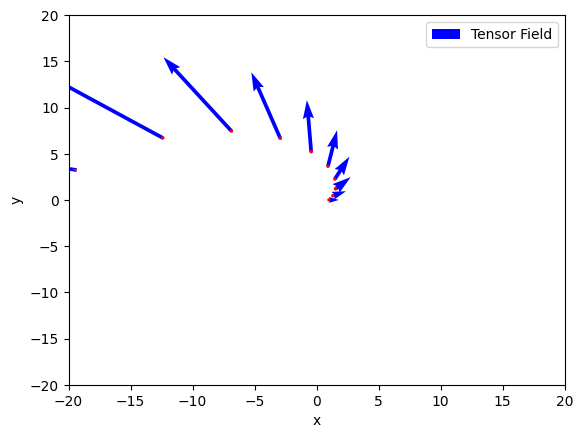

In [17]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# Define symbolic variables
t = sp.Symbol('t')
x, y = sp.symbols('x y')

# Define tensor function for the manifold
g_x = sp.exp(t) * sp.cos(t)
g_y = sp.exp(t) * sp.sin(t)

# Convert sympy expressions to functions that can evaluate on numpy arrays
g_x_func = sp.lambdify((t,), g_x, 'numpy')
g_y_func = sp.lambdify((t,), g_y, 'numpy')

# Visualize the tensor field using a quiver plot
fig, ax = plt.subplots()
t_range = np.linspace(0, 2*np.pi, 20)

# Evaluate the functions on the grid
U = g_x_func(t_range)
V = g_y_func(t_range)

ax.quiver(U, V, U, V, scale=50, color='blue', label="Tensor Field")

# Plot tangent vectors at various points on the manifold
for point in t_range:
    tang_vec_x = g_x_func(point)
    tang_vec_y = g_y_func(point)
    ax.quiver(tang_vec_x, tang_vec_y, tang_vec_x, tang_vec_y, scale=50, scale_units="xy", color='red')

# Set plot properties and display legend
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_xlim(-20, 20)
ax.set_ylim(-20, 20)
ax.legend()
plt.show()

In [ ]:
import sympy as sp

# Define the symbols
sqrt_mu, h, Phi, c, wavelength, tan_psi, diamond, theta = sp.symbols('sqrt_mu h Phi c wavelength tan_psi diamond theta')
R, kxp_w, Gamma_Omega, infty_mil, zeta, Delta, H, A, i = sp.symbols('R kxp_w Gamma_Omega infty_mil zeta Delta H A i')
x, t, square_fork = sp.symbols('x t square_fork')
F_Lambda = sp.symbols('F_Lambda')

# Calculate the square root of F_Lambda, assuming F_Lambda is nonnegative
sqrt_F_Lambda = sp.sqrt(F_Lambda)

# Define E_Omega using SymPy symbolically
E_Omega = sqrt_F_Lambda / R**2 - (h / Phi + c / wavelength) * sp.tan(tan_psi) * diamond * theta

# Substitute symbolic parameters with actual values
sqrt_F_Lambda_expr = infty_mil * zeta - ((Delta / H) + (A / i)) * kxp_w * (x**6 + t**2 + square_fork)**(1/3) + Gamma_Omega

# Combine the expressions into E_Omega_expr
E_Omega_expr = E_Omega.subs(sqrt_F_Lambda, sqrt_F_Lambda_expr)

# Simplify the expression for E_Omega
E_Omega_simplified = sp.simplify(E_Omega_expr)

# Define a function to compute E_Omega for given values
def compute_E_Omega(params):
    # Substitute the parameters into the E_Omega expression
    return E_Omega_simplified.subs(params)

# Example usage of the function with arbitrary numerical values for illustration (all set to 1)
example_params = {
    sqrt_mu: 1, h: 1, Phi: 1, c: 1, wavelength: 1, tan_psi: 1, diamond: 1, theta: 1,
    R: 1, kxp_w: 1, Gamma_Omega: 1, infty_mil: 1, zeta: 1, Delta: 1, H: 1, A: 1, i: 1,
    x: 1, t: 1, square_fork: 1, F_Lambda: 1
}

# Compute E_Omega using the example parameters
E_Omega_value = compute_E_Omega(example_params)

# Output the computed value for E_Omega
print("Computed value of E_Omega with example parameters:")
sp.pprint(E_Omega_value)

Computed value of E_Omega with example parameters:
-2⋅tan(1) - 0.884499140614817
